## Linear Regression for house price prediction

Use a multivariate linear regression model to predict house prices

In [14]:
import pandas as pd
import numpy as np

In [51]:
# Load train and test data
data_path = '../data/house_prices/'
trainset = pd.read_csv(data_path + 'train.csv', low_memory=False)
testset = pd.read_csv(data_path + 'test.csv', low_memory=False)

print('No. of training samples: ', len(trainset))
print('No. of test samples: ', len(testset))

No. of training samples:  1460
No. of test samples:  1459


In [61]:
# Get list of numerical features to use

num_features = []
with open('../data/house_prices/num_features_0.txt', 'r') as fp:
    for item in fp:
        num_features.append(item)

num_features = [x.strip('\n') for x in num_features]
num_features_id = num_features.copy()
num_features_id.append('Id')

In [128]:
# Remove nans in training set
trainset_dropna = trainset[num_features_id].dropna()
print('No. of houses remaining in training set: ', len(trainset_dropna))

# Remove nans in test set
testset_dropna = testset[num_features_id].dropna()
print('No. of houses remaining in test set: ', len(testset_dropna))

No. of houses remaining in training set:  1121
No. of houses remaining in test set:  1146


In [131]:
# Split data into features and label (price)
Xtrain = trainset_dropna[num_features]
ytrain = trainset.iloc[trainset_dropna.index.values]['SalePrice']

Xtest = testset_dropna[num_features]
#ytest = testset.iloc[testset_dropna.index.values]['SalePrice']

print('No. of features: ', len(Xtrain.columns))

No. of features:  30


Use `scikit-learn` linear regression

In [110]:
from sklearn.linear_model import LinearRegression

# Fit linear regression model
lin_reg = LinearRegression().fit(X=Xtrain.values, y=ytrain.values)

In [117]:
ytrain.values.reshape(-1,1)

array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [127]:
from sklearn.metrics import r2_score

# Use linear regression model to make prediction
ytrain_pred = lin_reg.predict(Xtrain)

# Get metrics for training set
print('R**2 score: ', r2_score(ytrain, ytrain_pred))

R**2 score:  0.8072728457857207


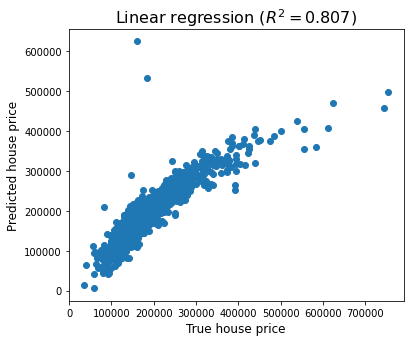

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,5))
plt.scatter(ytrain, ytrain_pred)
plt.xlabel('True house price', fontsize=12)
plt.ylabel('Predicted house price', fontsize=12)
plt.title('Linear regression ($R^2=0.807$)', fontsize=16)

plt.savefig('linear_regression/house_prices_linear_regression.png', format='png', dpi=100, bbox_inches='tight', facecolor='w')
plt.show()